In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from skimage import exposure
import numpy as np
import math
import colorsys



In [2]:
import cv2

In [4]:
#自动计算产生数据，线性回归进行公式推导

#8bit像素深度取值
values = np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255])
vLen = int(values.shape[0])

#不同的三通道取值总数，包括三通道值不同（vLen * (vLen - 1)* (vLen - 2)/6即values取三个）、
#三通道值其中两个通道值一样（vLen * (vLen - 1)即values取两个，两个通道值一样的选择就有两种）、
#三通道值一样（vLen）
#pixelNum = int(vLen * (vLen - 1)* (vLen - 2)/6 + vLen * (vLen - 1) + vLen) 

pixelNum = vLen * vLen *vLen
pixels = np.empty((pixelNum,3))

#生成并记录这pixelNum种三通道取值
count = 0
# for i in range(vLen):
#     for j in range(i + 1):
#         for k in range(j + 1):
#             pixels[count] = [values[i], values[j], values[k]]
#             count = count + 1
for i in range(vLen):
    for j in range(vLen):
        for k in range(vLen):
            pixels[count] = [values[i], values[j], values[k]]
            count = count + 1

#透射率t取值
#ts = np.array([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0])
#ts = np.array([0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1.0])
ts = np.array([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
tLen = int(ts.shape[0])

#大气光值A取值
As = np.array([150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255])
ALen = int(As.shape[0])

#不同的三通道值、大气光值、透射率计算生成并记录I、G、H
datasNum = int(pixelNum * tLen * ALen)
X = np.empty((datasNum,4))
Y = np.empty((datasNum,1))
dataCount = 0;
for i in range(pixelNum):
    for j in range(ALen):
        for k in range(tLen):
            I = np.empty((3,1))
            I_adjust = np.empty((3,1))
            for m in range(3):
                I[m] = pixels[i][m] * ts[k] + (1 - ts[k]) * As[j]
                I_adjust[m] = I[m]
#                 if(I[m] > As[j]):
#                      I_adjust[m] = (I[m] - As[j]) * As[j] / (255 - As[j]) + As[j]
            G = math.sqrt((I_adjust[0] - As[j])**2 + (I_adjust[1] - As[j])**2 + (I_adjust[2] - As[j])**2)/As[j]
            H = math.sqrt((I[0] - I[1])**2 + (I[1] - I[2])**2 + (I[0] - I[2])**2)/As[j]
            hsv = rgb_to_hsv(I[0], I[1], I[2])
            S = hsv[1]
            V = hsv[2]
            X[dataCount] = [G,H,S,V]
            Y[dataCount] = ts[k]
            dataCount = dataCount + 1
regressor6660 = LinearRegression()
regressor6660.fit(X, Y)
print(regressor6660.coef_)
print(regressor6660.intercept_)
print(dataCount)

[[0.60414381 0.10715564 0.17760646 0.14141303]]
[0.02258967]
64960896


In [ ]:
# [[0.59377877 0.1019164  0.16723548 0.1564373 ]]
# [0.0334319]
# 64960896

In [3]:
def rgb_to_hsv(r, g, b):
    # 将RGB值除以255得到0-1之间的小数
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    
    # 使用colorsys库进行转换
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    
    return h, s, v
def guided_filter(I,p,win_size,eps):

    mean_I = cv2.blur(I,(win_size,win_size))
    mean_p = cv2.blur(p,(win_size,win_size))

    corr_I = cv2.blur(I*I,(win_size,win_size))
    corr_Ip = cv2.blur(I*p,(win_size,win_size))

    var_I = corr_I-mean_I*mean_I
    cov_Ip = corr_Ip - mean_I*mean_p

    a = cov_Ip/(var_I+eps)
    b = mean_p-a*mean_I

    mean_a = cv2.blur(a,(win_size,win_size))
    mean_b = cv2.blur(b,(win_size,win_size))

    q = mean_a*I + mean_b
    return q
def get_min_channel(img):
    return np.min(img,axis=2)
def get_max_channel(img):
    return np.max(img,axis=2)
def max_min_filter(image,r=7,flag=True,divide=1,borderType=cv2.BORDER_REPLICATE):
    img = image.copy()
    new_img = cv2.copyMakeBorder(img,r,r,r,r,borderType)
    h,w = img.shape
    for i in range(h//divide):
        for j in range(w):
            if flag:
                img[i,j]=new_img[i:i+2*r+1,j:j+2*r+1].max()
            else:
                img[i,j]=new_img[i:i+2*r+1,j:j+2*r+1].min()
    return img
def min_filter(img,r=7):
    side_len = 2*r+1
    kernel = np.ones((side_len,side_len))
    return cv2.erode(img,kernel)#最小值滤波器，可用腐蚀替代
def max_filter(img,r=7):
    side_len = 2*r+1
    kernel = np.ones((side_len,side_len))
    return cv2.dilate(img,kernel)#最大值滤波器，用膨胀替代
def get_A(img_haze,name,bins_l,r=21,divide = 3,rate=0.003):
    h = img_haze.shape[0]
    img_haze = img_haze[0:h//divide,:]
    min_c = get_min_channel(img_haze)
    dark_channel = min_filter(min_c,r)
    hist,bins = np.histogram(dark_channel,bins=bins_l)#得到直方图
    num = dark_channel.size * (1-rate)
    d = np.cumsum(hist)#累加
    threshold=0
    for i in range(bins_l-1,0,-1):
        if d[i]<=num:
            threshold=i
            break
    #A = img_haze[dark_channel>=bins[threshold]].max()
    A = min_c[dark_channel>=bins[threshold]].max()
    #候选区域标记为红色
#    show  = np.copy(img_haze)
#    show[dark_channel>=bins[threshold]] = 0,0,255
#     cv2.imshow('show',show)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#    cv2.imwrite('./result0/most_haze_opaque_region/most_haze_opaque_region'+name+'.jpg',show)
    return A
def rgb_to_hex(r, g, b):
    hex_value = '#{:02x}{:02x}{:02x}'.format(r, g, b)
    return hex_value

import matplotlib.pyplot as plt
# plt.rcParams['axes.facecolor'] = 'white'

In [4]:
#G、H与t的关系
A = 230
# exs = np.array([[255,0,0],[255,0,255],[0,128,128],[0,0,0],[25,98,234],[64,220,30]])
# exLen = int(exs.shape[0])

exs = np.array([[0,0,0],[128,0,255],[240,100,100],[81,223,247],[30,241,126],[125,132,10],[0,60,80]])
exLen = int(exs.shape[0])

ts = np.array([0.0,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0])
tLen = int(ts.shape[0])

data_G = np.empty((exLen,tLen))
data_H = np.empty((exLen,tLen))
for i in range(exLen):
    for k in range(tLen):
        I = np.empty((3,1))
        I_adjust = np.empty((3,1))
        for m in range(3):
            I[m] = exs[i][m] * ts[k] + (1 - ts[k]) * A
            I_adjust[m] = I[m]
            if(I[m] > A):
                 I_adjust[m] = (I[m] - A) * A / (255 - A) + A
        G = math.sqrt((I_adjust[0] - A)**2 + (I_adjust[1] - A)**2 + (I_adjust[2] - A)**2)/A
        H = math.sqrt((I[0] - I[1])**2 + (I[1] - I[2])**2 + (I[0] - I[2])**2)/A
        data_G[i][k] = G
        data_H[i][k] = H
        


[]

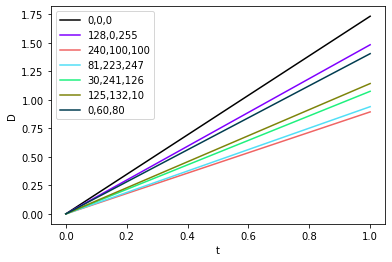

In [5]:
for i in range(exLen):
    separator = ','
    color10 = separator.join(str(num) for num in exs[i])
    color16 = rgb_to_hex(exs[i][0],exs[i][1],exs[i][2])
    plt.plot(ts,data_G[i],color16,label=color10)
plt.xlabel('t')
plt.ylabel('D')
plt.legend()
plt.plot()

[]

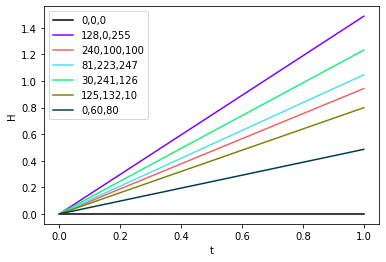

In [118]:
for i in range(exLen):
    separator = ','
    color10 = separator.join(str(num) for num in exs[i])
    color16 = rgb_to_hex(exs[i][0],exs[i][1],exs[i][2])
    plt.plot(ts,data_H[i],color16,label=color10)
plt.xlabel('t')
plt.ylabel('H')
plt.legend()
plt.plot()

In [2]:
import cv2


In [1]:
#新算法
#像素级运算
i = 101
I = cv2.imread('./images/'+str(i) + '.png')
I_c = I.copy()
I = np.float32(I)
I_c = np.float32(I_c)

A = 216

h,w,c = I_c.shape
data_G = np.empty((h,w))
data_H = np.empty((h,w))
data_S = np.empty((h,w))
data_V = np.empty((h,w))
t = np.empty((h,w))
for i in range(h):
    for j in range(w):
        t_max = 0
        temp = 0
        for k in range(c):
            if(I_c[i][j][k]> A):
                temp = (I_c[i][j][k] - A)/(255 - A)
                I_c[i][j][k] = (I_c[i][j][k] - A) * A / (255 - A)
                
            else:
                temp = (A - I_c[i][j][k])/A
            if(temp > t_max):
                t_max = temp
        data_G[i][j] = math.sqrt((I_c[i][j][0] - A)**2 + (I_c[i][j][1] - A)**2 + (I_c[i][j][2] - A)**2)/A
        data_H[i][j] = math.sqrt((I[i][j][0] - I[i][j][1])**2 + (I[i][j][1] - I[i][j][2])**2 + (I[i][j][0] - I[i][j][2])**2)/A
        
        hsv = rgb_to_hsv(I[i][j][0], I[i][j][1], I[i][j][2])
        S = hsv[1]
        V = hsv[2]
        data_S[i][j] = S
        data_V[i][j] = V
        t_predict = regressor6660.predict(np.array([[data_G[i][j],data_H[i][j],S,V]]))
        if(t_predict > t_max):
            t_max = t_predict
        t[i][j] = t_max
t = np.clip(t,0.1,1)
t = t[:,:,np.newaxis].repeat(3,axis=2)#升维至(r,w,3)
J = (I-A)/t + A
J = np.clip(J,0,255)#这两句位置不能交换，本身J里面数据的取值是可能超过255（uint8的取值上限）
J = np.uint8(J)
I = np.uint8(I)
cv2.imshow('t',t)
cv2.imshow('I',I)
cv2.imshow('J',J)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [22]:
#矩阵运算
import time
i = 110
I_int = cv2.imread('./images/'+str(i) + '.png')
time1 = time.time()
I = np.float32(I_int)

I_hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

#I_c = I.copy()
#I_c = np.float32(I_c)
I_c = I

A = get_A(I_int,str(i),256,r=7,divide = 1,rate=0.002)
print(A)
#A = 224
bGamma = False

h, s, v = cv2.split(I_hsv)
I_S = s
I_V = v/255.0

b, g, r = cv2.split(I_c)
#b_int, g_int, r_int = cv2.split(I_int)

# gray_I = cv2.cvtColor(I_int,cv2.COLOR_BGR2GRAY)
# b = guided_filter(gray_I/255.0,b,7,0.001)
# g = guided_filter(gray_I/255.0,g,7,0.001)
# r = guided_filter(gray_I/255.0,r,7,0.001)

# I_adjust_b = b
# I_adjust_g = g
# I_adjust_r = r

# if(A < 255):
#     I_b = (b - A) * A / (255 - A) + A
#     I_g = (g - A) * A / (255 - A) + A
#     I_r = (r - A) * A / (255 - A) + A
#     I_b[(b_int < A)] = 0
#     I_g[(g_int < A)] = 0
#     I_r[(r_int < A)] = 0
#     b[(b_int >= A)] = 0
#     g[(g_int >= A)] = 0
#     r[(r_int >= A)] = 0
#     I_adjust_b = b + I_b
#     I_adjust_g = g + I_g
#     I_adjust_r = r + I_r

# I_adjust_b = b + I_b
# I_adjust_g = g + I_g
# I_adjust_r = r + I_r


#G = np.sqrt((I_adjust_b - A)**2 + (I_adjust_g - A)**2 + (I_adjust_r - A)**2)/A
G = np.sqrt((b - A)**2 + (g - A)**2 + (r - A)**2)/A

# b0,g0,r0 = cv2.split(I)
# H = np.sqrt((b0 - g0)**2 + (b0 - r0)**2 + (g0 - r0)**2)/A
H = np.sqrt((b - g)**2 + (b - r)**2 + (g - r)**2)/A

m1 = G.reshape((G.shape[0],G.shape[1],1))
m2 = H.reshape((H.shape[0],H.shape[1],1))
m3 = I_S.reshape((I_S.shape[0],I_S.shape[1],1))
m4 = I_V.reshape((I_V.shape[0],I_V.shape[1],1))


data_X = np.concatenate((m1, m2,m3,m4), axis=2)
adjust_shape = (data_X.shape[0]*data_X.shape[1],data_X.shape[2])
data_X_adjust = data_X.reshape(adjust_shape)

t_predict = regressor6660.predict(data_X_adjust)


# data_X_poly = poly.fit_transform(data_X_adjust)
# t_predict = regressor4.predict(data_X_poly)

t = t_predict.reshape((data_X.shape[0],data_X.shape[1]))

#cv2.imwrite('./result_improved/new_t1_' + str(i) +'.png',t * 255)

gray_I = cv2.cvtColor(I_int,cv2.COLOR_BGR2GRAY)
t = guided_filter(gray_I/255.0,t,15,0.001)

t = np.clip(t,0.1,1)

#cv2.imwrite('./result_improved/new_t2_' + str(i) +'.png',t * 255)
t = t[:,:,np.newaxis].repeat(3,axis=2)#升维至(r,w,3)


J = (I-A)/t + A
J = np.clip(J,0,255)
if(bGamma):
#     J = J / 255.0
#     J = J ** (np.log(0.5) / np.log(J.mean()))  # gamma校正
#     J = J * 255.0
    J = exposure.adjust_gamma(J/255.0,0.5) * 255.0
J = np.clip(J,0,255)#这两句位置不能交换，本身J里面数据的取值是可能超过255（uint8的取值上限）
J = np.uint8(J)

time2 = time.time()
print("time:"+str(time2-time1))

I = np.uint8(I)

cv2.imshow('t',t)
cv2.imshow('I',I)
cv2.imshow('J',J)
cv2.imwrite('./result_improved/new_J_' + str(i) +'.png',J)
cv2.waitKey(0)
cv2.destroyAllWindows()

252
time:0.2802577018737793


In [6]:
#矩阵运算,直接公式数据
import time
i = 103

I_int = cv2.imread('./images/'+str(i) + '.png')
I = np.float32(I_int)
time1 = time.time()
I_hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

I_c = I.copy()
I_c = np.float32(I_c)

#A = get_A(I_int,str(i),256,r=21,divide = 3,rate=0.002)
#print(A)
A = 226
bGamma = False

h, s, v = cv2.split(I_hsv)
I_S = s
I_V = v/255.0

b, g, r = cv2.split(I_c)
b_int, g_int, r_int = cv2.split(I_int)

# gray_I = cv2.cvtColor(I_int,cv2.COLOR_BGR2GRAY)
# b = guided_filter(gray_I/255.0,b,7,0.001)
# g = guided_filter(gray_I/255.0,g,7,0.001)
# r = guided_filter(gray_I/255.0,r,7,0.001)

I_adjust_b = b
I_adjust_g = g
I_adjust_r = r

# if(A < 255):
#     I_b = (b - A) * A / (255 - A) + A
#     I_g = (g - A) * A / (255 - A) + A
#     I_r = (r - A) * A / (255 - A) + A
#     I_b[(b_int < A)] = 0
#     I_g[(g_int < A)] = 0
#     I_r[(r_int < A)] = 0
#     b[(b_int >= A)] = 0
#     g[(g_int >= A)] = 0
#     r[(r_int >= A)] = 0
#     I_adjust_b = b + I_b
#     I_adjust_g = g + I_g
#     I_adjust_r = r + I_r

# I_adjust_b = b + I_b
# I_adjust_g = g + I_g
# I_adjust_r = r + I_r


G = np.sqrt((I_adjust_b - A)**2 + (I_adjust_g - A)**2 + (I_adjust_r - A)**2)/A

b0,g0,r0 = cv2.split(I)
H = np.sqrt((b0 - g0)**2 + (b0 - r0)**2 + (g0 - r0)**2)/A



m1 = G.reshape((G.shape[0],G.shape[1],1))
m2 = H.reshape((H.shape[0],H.shape[1],1))
m3 = I_S.reshape((I_S.shape[0],I_S.shape[1],1))
m4 = I_V.reshape((I_V.shape[0],I_V.shape[1],1))

# [[0.59377877 0.1019164  0.16723548 0.1564373 ]]
# [0.0334319]


t = 0.0334319 + 0.59377877 * G + 0.1019164 * H + 0.16723548 * I_S +  0.1564373 * I_V
cv2.imwrite('./result_improved/new_G_' + str(i) +'.png',G * 255)
cv2.imwrite('./result_improved/new_H_' + str(i) +'.png',H * 255)
cv2.imwrite('./result_improved/new_S_' + str(i) +'.png',I_S * 255)
cv2.imwrite('./result_improved/new_V_' + str(i) +'.png',I_V * 255)

# data_X = np.concatenate((m1, m2,m3,m4), axis=2)
# adjust_shape = (data_X.shape[0]*data_X.shape[1],data_X.shape[2])
# data_X_adjust = data_X.reshape(adjust_shape)

# t_predict = regressor66.predict(data_X_adjust)


# # data_X_poly = poly.fit_transform(data_X_adjust)
# # t_predict = regressor4.predict(data_X_poly)

# t = t_predict.reshape((data_X.shape[0],data_X.shape[1]))

#cv2.imwrite('./result_improved/new_t1_' + str(i) +'.png',t * 255)

gray_I = cv2.cvtColor(I_int,cv2.COLOR_BGR2GRAY)
t = guided_filter(gray_I/255.0,t,15,0.001)

t = np.clip(t,0.1,1)

#cv2.imwrite('./result_improved/new_t2_' + str(i) +'.png',t * 255)
t = t[:,:,np.newaxis].repeat(3,axis=2)#升维至(r,w,3)


J = (I-A)/t + A
J = np.clip(J,0,255)
if(bGamma):
#     J = J / 255.0
#     J = J ** (np.log(0.5) / np.log(J.mean()))  # gamma校正
#     J = J * 255.0
    J = exposure.adjust_gamma(J/255.0,0.5) * 255.0
J = np.clip(J,0,255)#这两句位置不能交换，本身J里面数据的取值是可能超过255（uint8的取值上限）
J = np.uint8(J)
time2 = time.time()
print("time:"+str(time2-time1))

I = np.uint8(I)
cv2.imwrite('./result_improved/new_J_' + str(i) +'.png',J)
cv2.imshow('t',t)
cv2.imshow('I',I)
cv2.imshow('J',J)
cv2.waitKey(0)
cv2.destroyAllWindows()

time:0.09949302673339844


In [31]:
#对亮度限制对比度自适应直方图均衡化CLAHE
def clahe_v(image,clipLimit=2.0, tileGridSize=(8, 8)):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(img_hsv)
    clahe = cv2.createCLAHE(clipLimit, tileGridSize)
    v = clahe.apply(v)
    image_clahe = cv2.merge([h, s, v])
    image_clahe = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return image_clahe

In [34]:
img = clahe_v(J)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [113]:
#S、V与t的关系
A = 230
exs = np.array([[0,0,0],[128,0,255],[240,100,100],[81,223,247],[30,241,126],[125,132,10],[0,60,80]])
exLen = int(exs.shape[0])
np.empty((exLen,tLen))

ts = np.array([0.0,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0])
tLen = int(ts.shape[0])

data_S = np.empty((exLen,tLen))
data_V = np.empty((exLen,tLen))
for i in range(exLen):
    for k in range(tLen):
        I = np.empty((3,1))
        I_adjust = np.empty((3,1))
        for m in range(3):
            I[m] = exs[i][m] * ts[k] + (1 - ts[k]) * A
        hsv = rgb_to_hsv(I[0], I[1], I[2])
        data_S[i][k] = hsv[1]
        data_V[i][k] = hsv[2]
        

[]

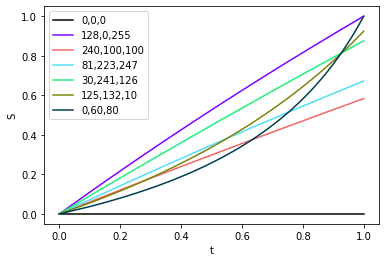

In [114]:
for i in range(exLen):
    separator = ','
    color10 = separator.join(str(num) for num in exs[i])
    color16 = rgb_to_hex(exs[i][0],exs[i][1],exs[i][2])
    plt.plot(ts,data_S[i],color16,label=color10)
plt.xlabel('t')
plt.ylabel('S')
plt.legend()
plt.plot()

[]

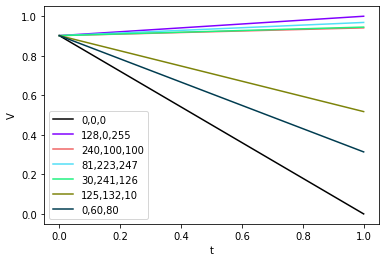

In [115]:
for i in range(exLen):
    separator = ','
    color10 = separator.join(str(num) for num in exs[i])
    color16 = rgb_to_hex(exs[i][0],exs[i][1],exs[i][2])
    plt.plot(ts,data_V[i],color16,label=color10)
plt.xlabel('t')
plt.ylabel('V')
plt.legend()
plt.plot()